<hr>

#### Pedro Atencio Ortiz - 2020 (pedroatencio@itm.edu.co)


# Clustering Techniques Examples in Scikit-learn


In [17]:
# Funciones utilitarias

import numpy as np
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt

def generate_data(data_type, noise=0.2):
    
    np.random.seed(0)
    if data_type == 'moons':
        X, Y = datasets.make_moons(500, noise=noise)
    elif data_type == 'circles':
        X, Y = sklearn.datasets.make_circles(500, noise=noise, factor=0.5)
    elif data_type == 'blobs':
        X, Y = sklearn.datasets.make_blobs(centers=2, cluster_std=noise)
    return X, Y

<hr>

## Load a binary dataset


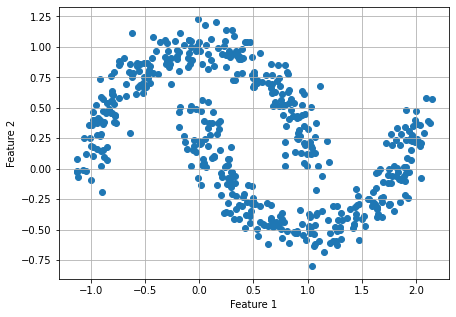

In [18]:
# Load some data (classification)

X, Y = generate_data('moons', noise=0.1)

color = ['blue' if y == 1 else 'red' for y in np.squeeze(Y)] # una lista para darle color a las clases

plt.figure(figsize=(7,5))
plt.scatter(X[:,0], X[:,1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()

plt.show()

<hr>

## Instatiate a Clustering model from sklearn

1. Load the model
2. Fit the model using .fit(DATASET)
3. Retrieve the labels (assigned clusters) 

In [28]:
#Load clustering techniques from sklearn

from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth

#bw = estimate_bandwidth(X, quantile=0.2)

#print("Estimated bandwidth: ", bw)

# ms = DBSCAN(eps=0.15, min_samples=5)
ms = KMeans(n_clusters=2)
ms.fit(X)
labels = ms.labels_ #Y

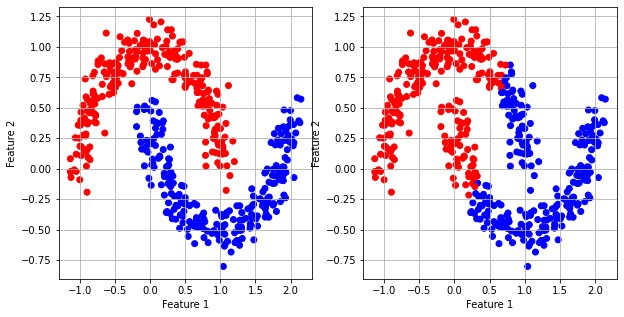

In [29]:
color_kmeans = ['blue' if y == 0 else 'red' for y in np.squeeze(labels)] # una lista para darle color a las clases

plt.figure(figsize=(10,5))

plt.subplot(121)
plt.scatter(X[:,0], X[:,1], color=color)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()

plt.subplot(122)
plt.scatter(X[:,0], X[:,1], color=color_kmeans)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()

plt.show()

<hr>

# Clustering Evaluation

Sum of Square Errors is the function which optimizes K-Means. In order to use different metrics visit: https://scikit-learn.org/stable/modules/clustering.html

In [30]:
print("SSE: ",ms.inertia_)

# Homogenity and Completeness requires ground-truth label

from sklearn.metrics import homogeneity_score, completeness_score

print("Homogenity: ", homogeneity_score(Y, labels))
print("Completeness: ", completeness_score(Y, labels))

SSE:  202.73736016042585
Homogenity:  0.1856275901158055
Completeness:  0.18566187682282118


<hr>

# Lets work!

## Data

1. Try loading datasets 'moons' y 'circles' and test the K-Means clustering.
2. Try changing noise level...the higher the more difficult.

## Clustering

1. Load MeanShift and DBScan over the data test preformed previosly. Which model is better?
2. Can you find a clustering technique and parameters which cam solve data='circles' with noise=0.07?

## Evaluation

1. Evaluate using homogenity and completeness on each case.

## Tech Review

1. Review different clustering techniques: https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py 